<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 3 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 27 September 2021</div>
<div style="text-align: right">Homework</div>

# How to use Python Libraries

To install python libraries, you open your anaconda terminal (on Windows), and type:
```(python)
conda install <the library>
```

or

```(python)
pip install <the library>
```

In image processing, `Pillow` (or `pil`) is a very popular library. You'll do your homework for next week, with it. And at the same time, you'll train to become a Hollywood producer!


# Building a comic book with python

<br />
<center>
<img src="fantastic_comics.jpg" width=200 />
</center>

I'll give you the main code blocks for your homework in this notebook, as well as some of the pictures. You'll have to make the code blocks work together to write a comic book in PDF format that consists of three pages of about 20 images each, with text.

The story needs to be a good story because you'll be graded on artistic merit, too!

Then I'll award Oscars to the best stories. The categories will be:

- best adapted screenplay
- best art direction
- best cinematography
- best Code
- best Code.zip
- best director
- best documentary
- best female
- best film editing
- best male
- best original screen play
- best picture
- best visual effects

**中国学生将用中文写故事**

**भारतीय छात्र कहानी को भारतीय में लिखेंगे**

**All submissions need to be accompanied by the same story in english**. In other words, your submission will consist to *two* pdf files, one with dialogue in *your* language, and one with dialogu3 in english. The pictures need to be the same.

Best भारतीय, 中国 comic books will be presented over zoom.

It is ***recommended*** to pick one of the themes in the accompanying zip file (`miyazaki`, `monkey king`, `jungle book`, or `avengers`). You may complete them with additional images in the same theme that you download on your own. If you think of a better theme, you *may change the theme*. 

*You need to write your own text*. The comic book ***needs to be*** in pdf format (not an image).

No teamwork on this homework. Individual submissions per student.

You're going to use an amazing python library for image processing called pillow, `PIL` in short.

Here are the python code blocks:

## Displaying images

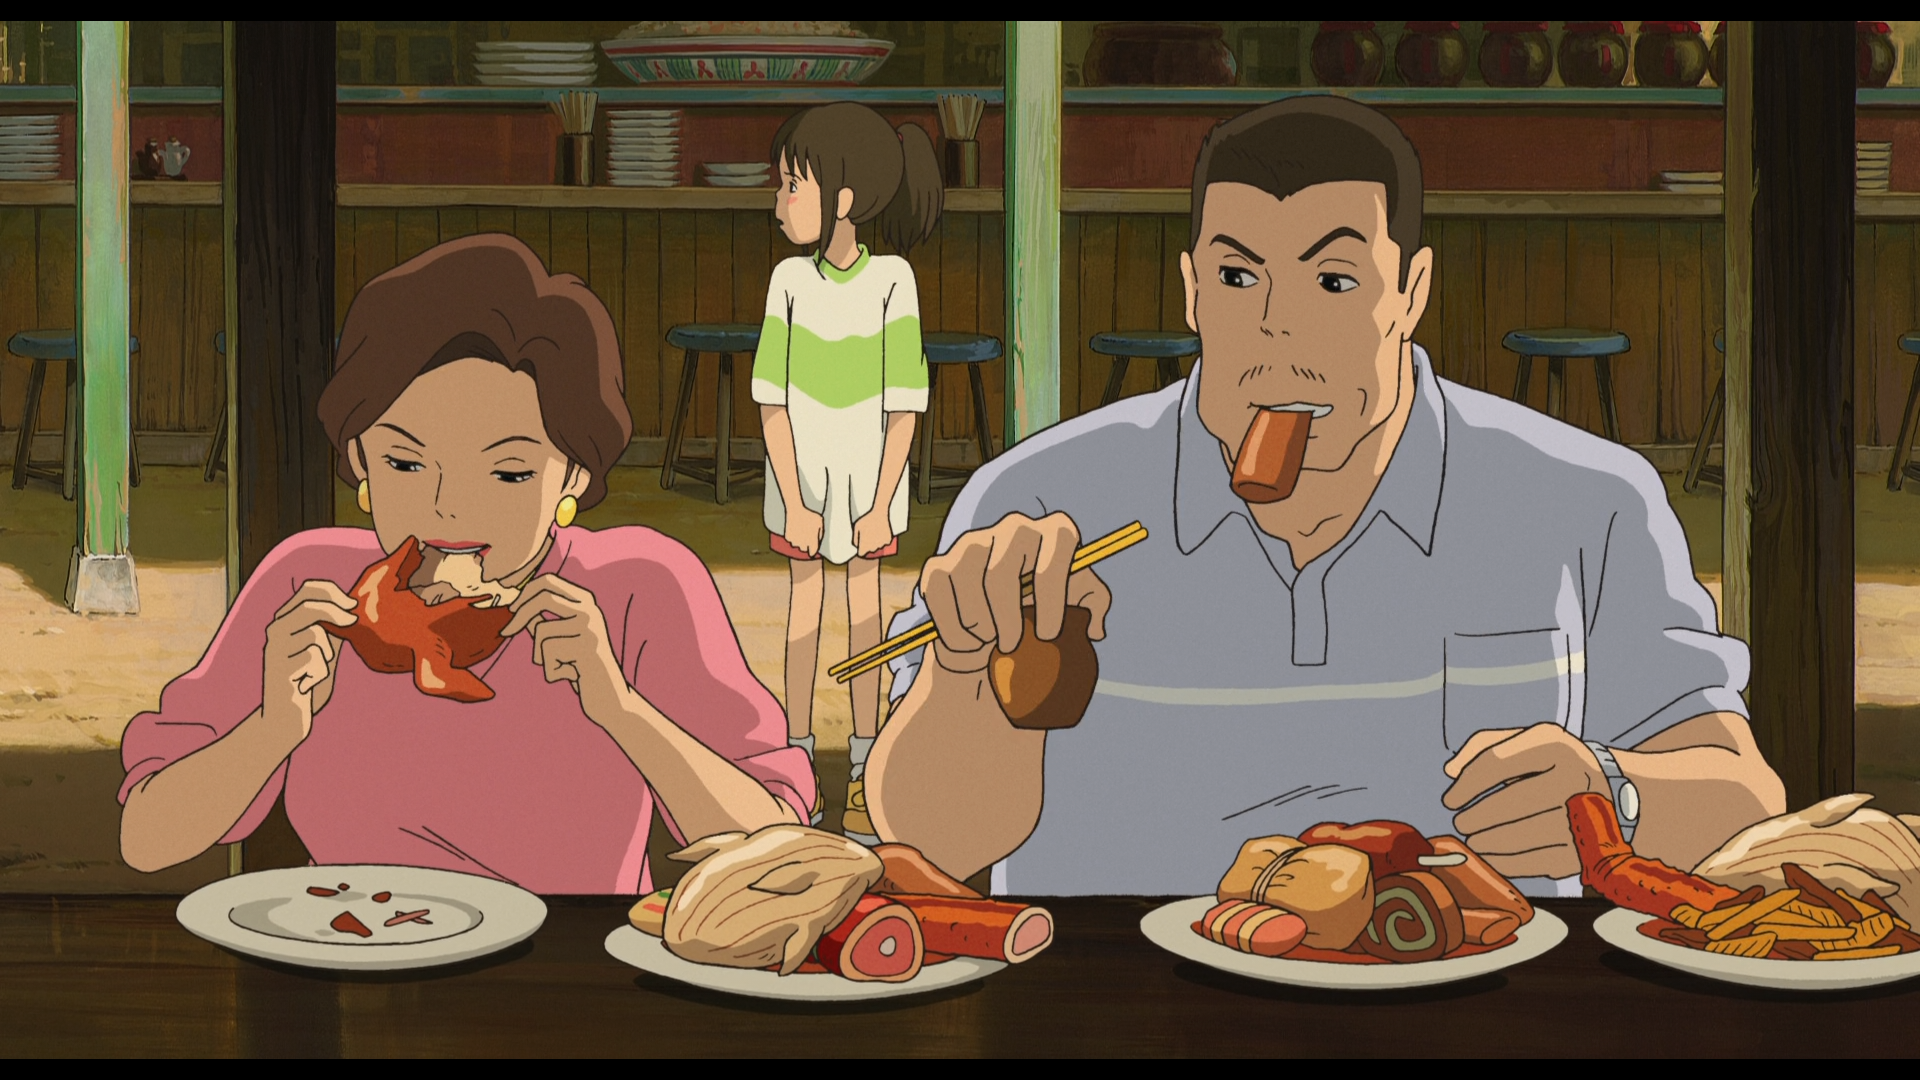

In [1]:
from IPython.display import Image
Image(filename='toons/miyazaki/spirited away/chihiro_parents.png', width=400)

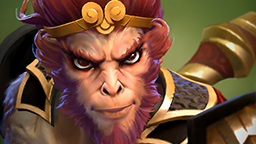

In [2]:
Image(filename='toons/monkey-king/Monkey_King.png', width=400)

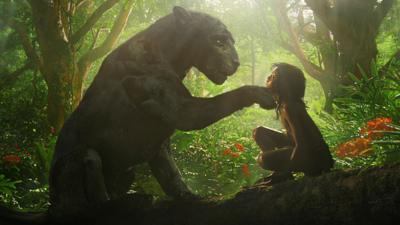

In [3]:
Image(filename='toons/jungle-book/_104680082_junglebook.jpg', width=400)

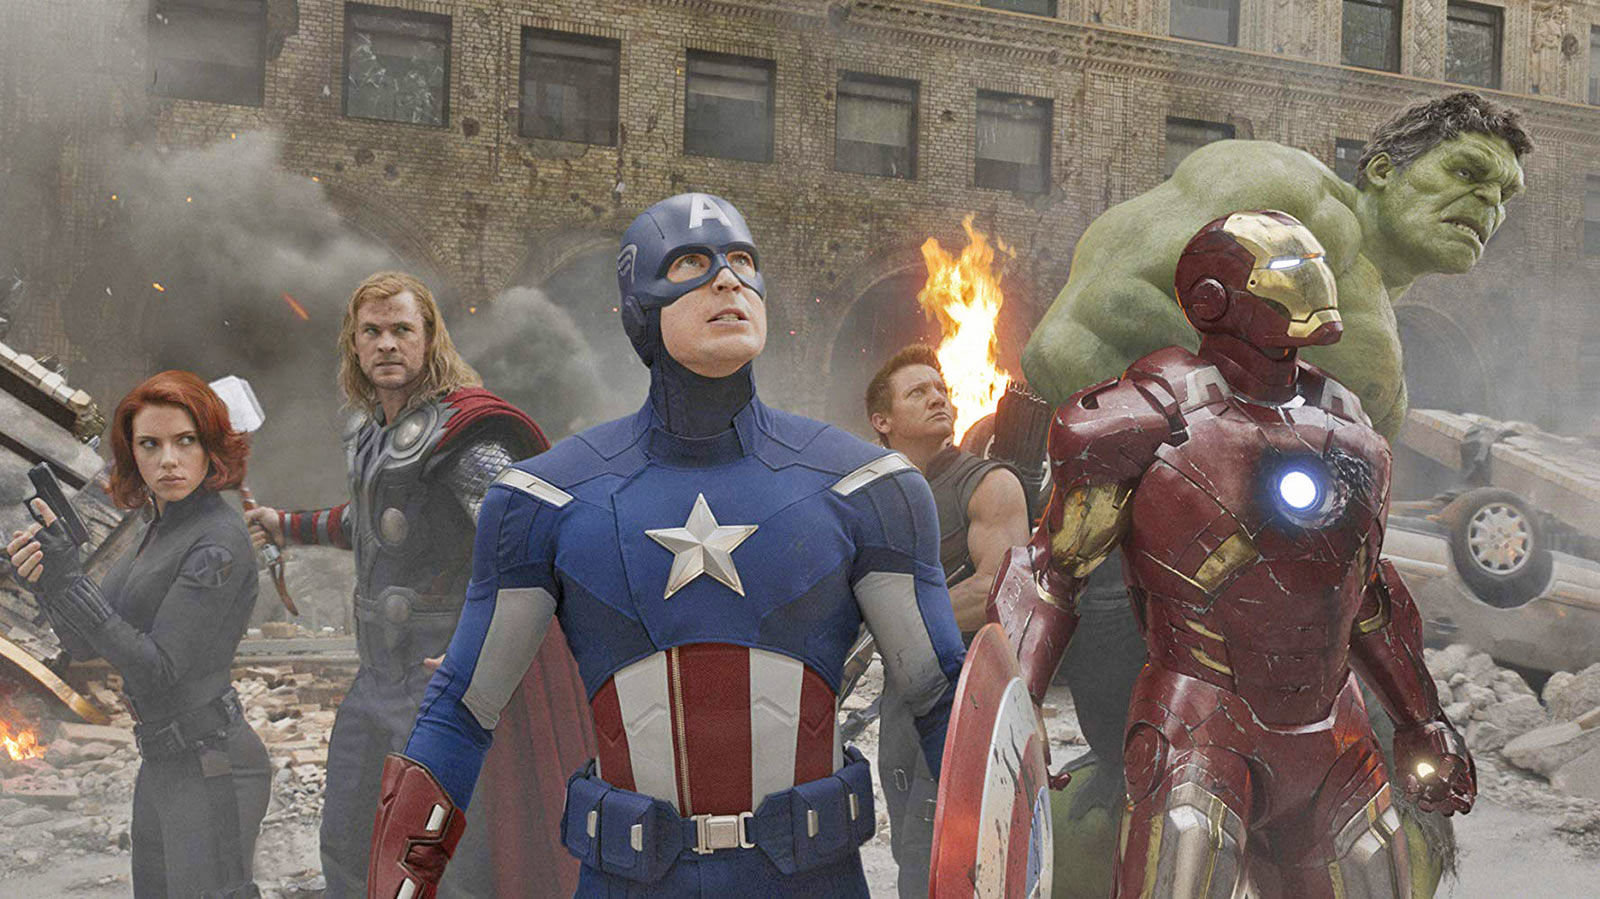

In [4]:
Image(filename='toons/avengers/dims.jpg', width=400)

## Adding a border

We add a border to the image with the `PIL` library:
```(python)
pip install pillow
```

In [5]:
from PIL import Image as pili, ImageOps as piliops

piliops.expand(pili.open('toons/avengers/dims.jpg'), border=(100,100),fill='white').save('toons/avengers/dims2.jpg')

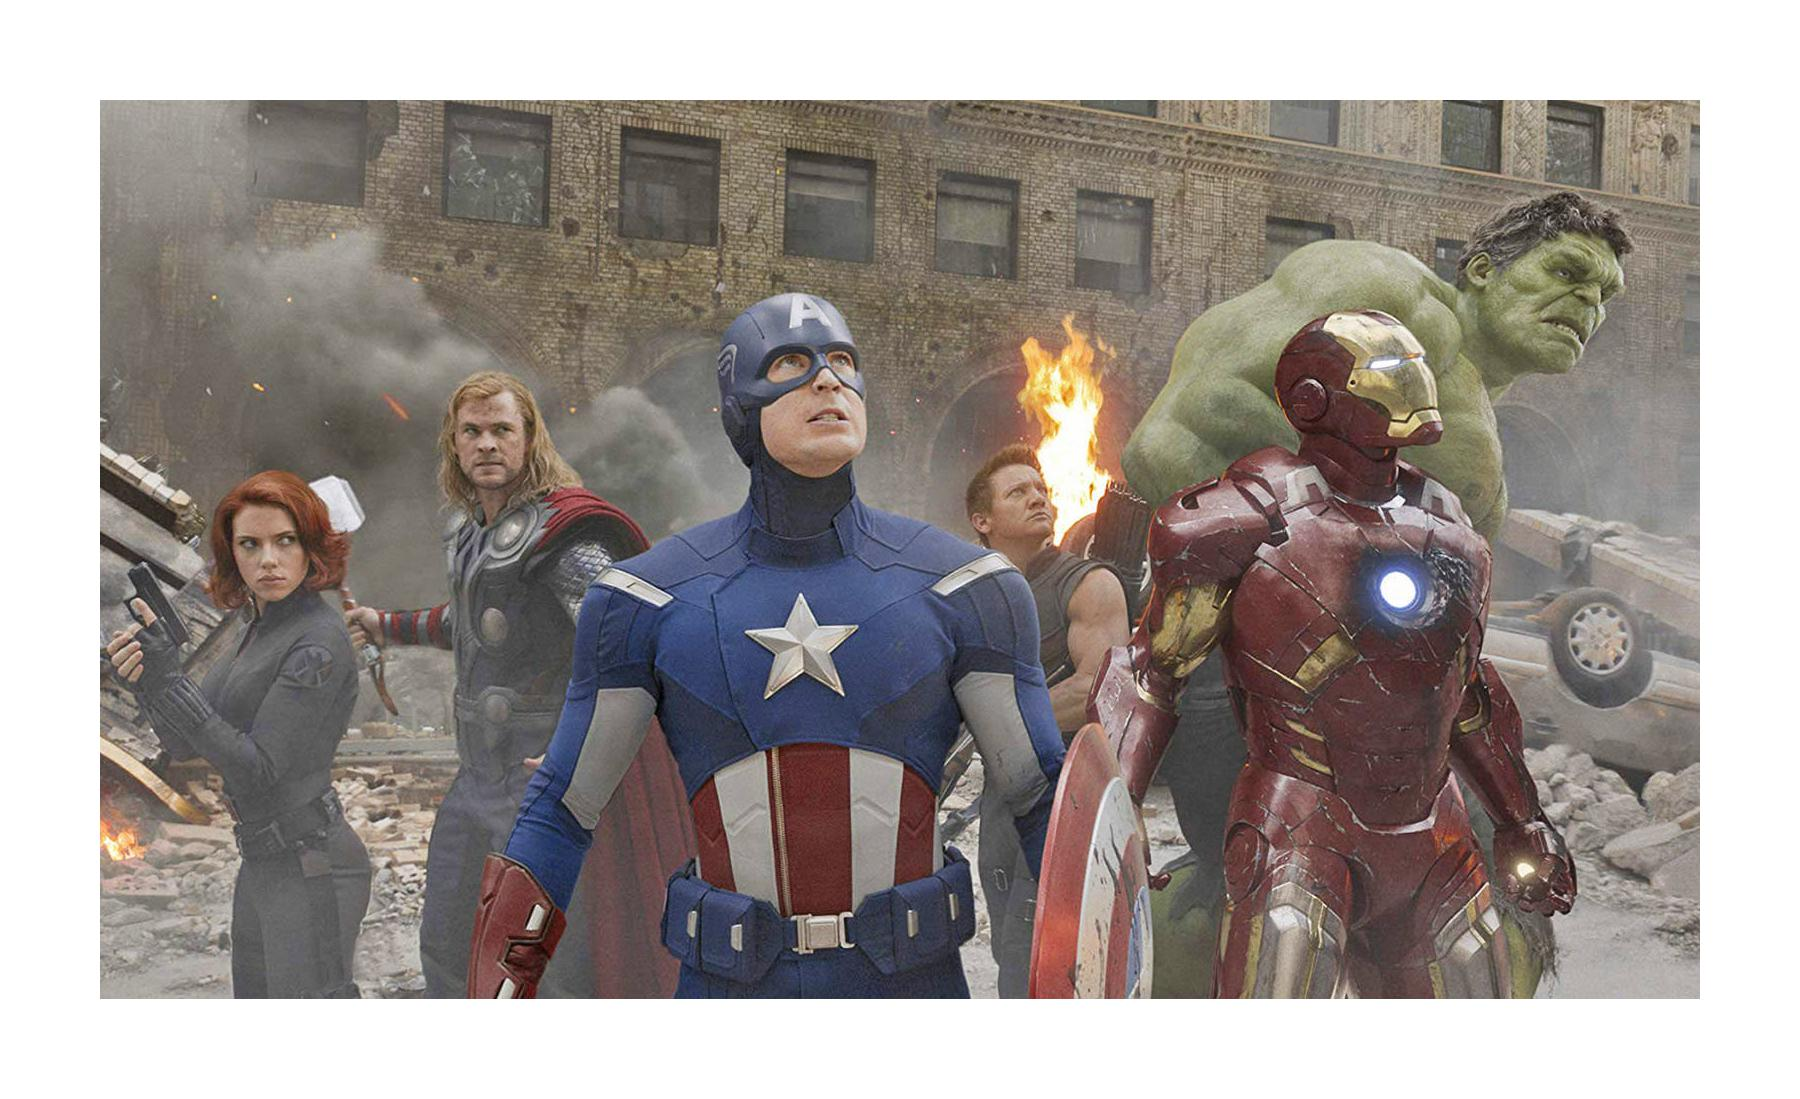

In [6]:
Image(filename='toons/avengers/dims2.jpg', width=400)

*You can't see the border, but it's there, and you'll need it to create cartoon strips!*

## Text overlays

This is mutli-line text with an opaque background:

In [7]:
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf 

caption = """Captain America:

Avengers: assemble!

Some people move on, but not us.

Cos if that's not gonna work, I don't know what is"""

TINT_COLOR = (0, 0, 0)  # Black
TRANSPARENCY = .25  # Degree of transparency, 0-100%
OPACITY = int(255 * TRANSPARENCY)

from PIL import Image, ImageFont, ImageDraw

img = pili.open('toons/avengers/dims2.jpg').convert('RGBA')

overlay = pili.new('RGBA', img.size, TINT_COLOR+(0,))
draw = pild.Draw(overlay)
font = pilf.truetype("arial.ttf", 66)
#x, y = (img.width - 510, img.height-100)
text = caption
w, h = font.getsize(text)
num_lines = len(text.split('\n'))
print(num_lines, w, h)
x, y = 100, img.height - (num_lines-0.1*num_lines)*h
#draw.rectangle((x, y, x + w, y + h), fill='black')
#draw.rectangle((x, y, x + w, y + 4*h), fill=TINT_COLOR+(OPACITY,))
draw.rectangle((x, y, x + img.width - 200, y + (num_lines-0.1*num_lines)*h), fill=TINT_COLOR+(OPACITY,))
draw.text((x, y), text, fill=(209, 239, 8), font=font)

# Alpha composite these two images together to obtain the desired result.
img = pili.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.

img.save('toons/avengers/dims3.jpg')

7 3858 74


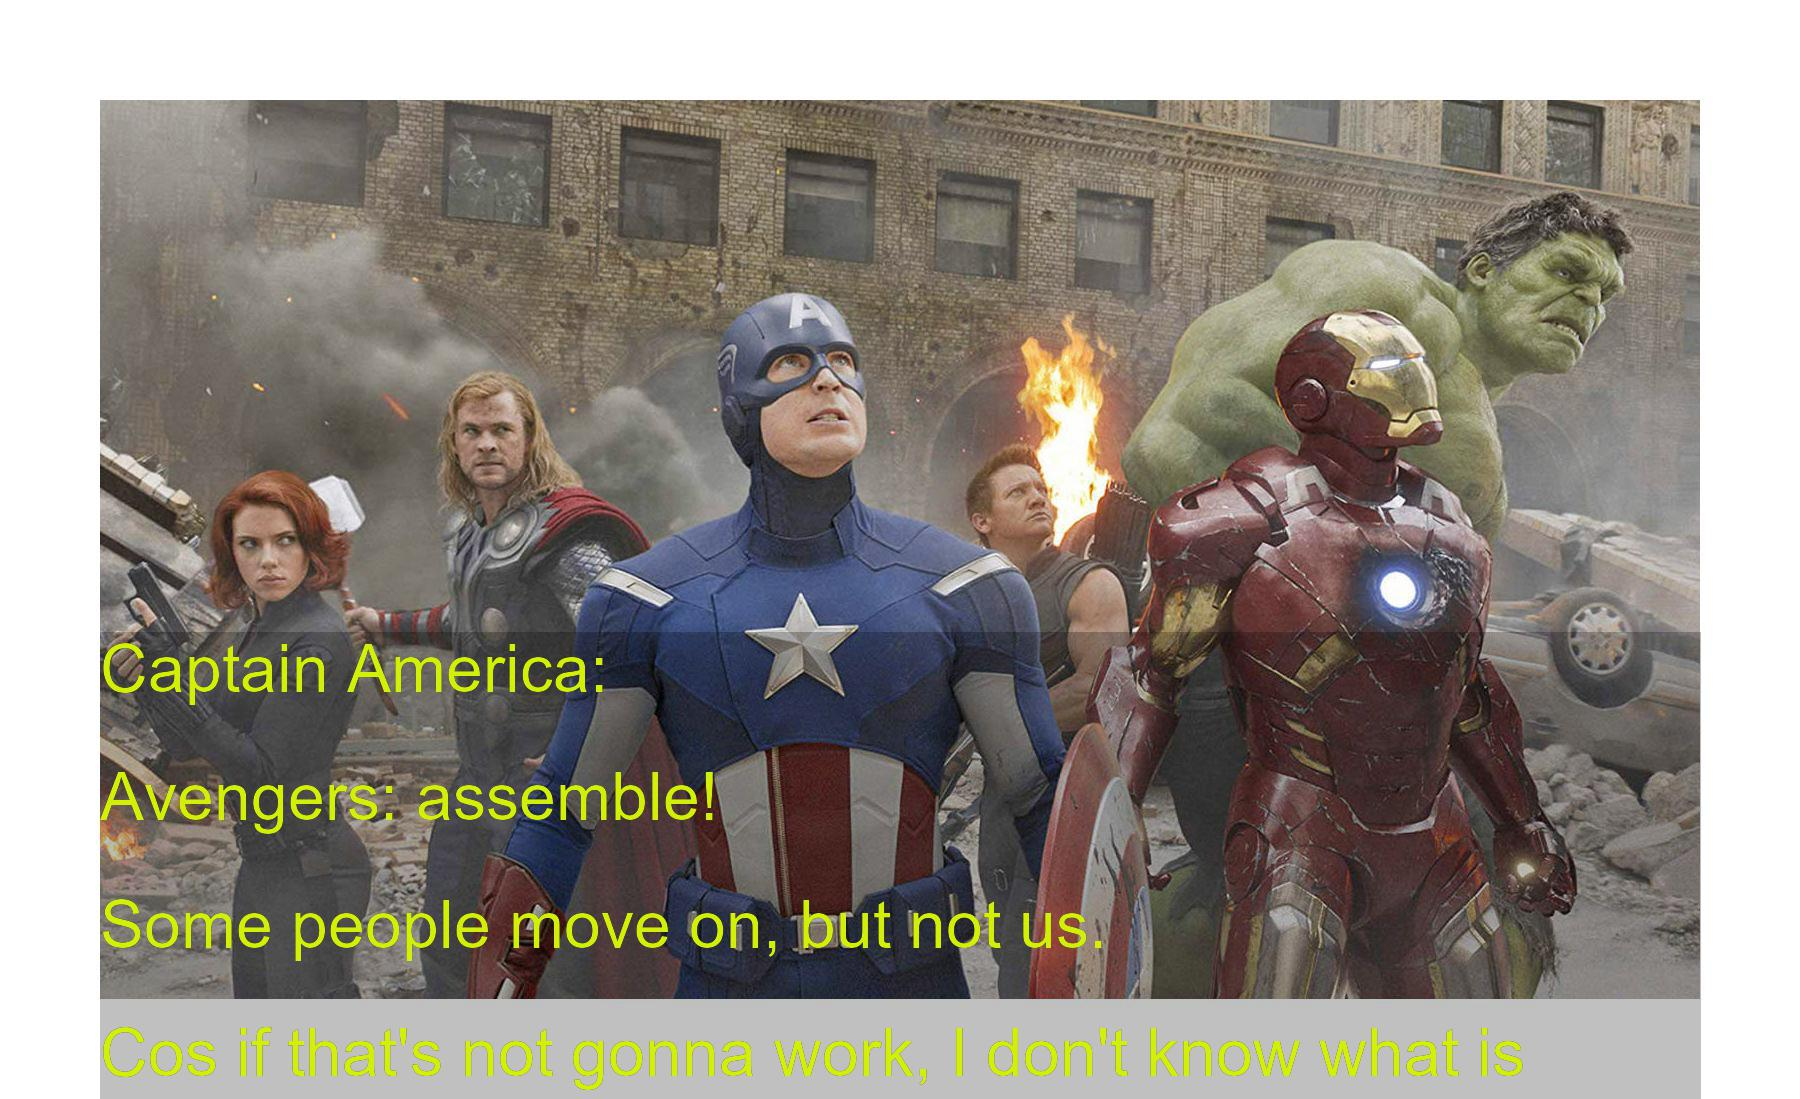

In [8]:
from IPython.display import Image
Image(filename='toons/avengers/dims3.jpg', width=400)

## Reading dialog file with pandas

Here, we use the `pandas` library to read a dialog script from a csv file, just like in Hollywood!

In [9]:
import pandas as pd
data = pd.read_csv('toons/avengers/dialog.csv')
data.head(10)

dialogs
0  Captain America:\n\nAvengers: assemble!\n\nSom...
1  Captain America:\n\nAvengers: assemble!\n\nSom...
2  Captain America:\n\nAvengers: assemble!\n\nSom...
3  Captain America:\n\nAvengers: assemble!\n\nSom...

In [10]:
import numpy as np
data.values[2][0]

"Captain America:\n\nAvengers: assemble!\n\nSome people move on, but not us.\n\nCos if that's not gonna work, I don't know what is"

# Unicode fonts

You either have to look for preinstalled truetype fonts that support your language, or you have to download the fonts to support your language (e.g. google's [noto](https://www.google.com/get/noto/) fonts). Otherwise, all you'll see as text on your image is just a bunch of tofu. No kidding, *tofu* is what these characters below are called:

<br />
<center>
<img src="toons/avengers/tofu.jpg" width=400 />
</center>

Also, do not forget the `u` in front of the text!

Here for example for me:

In [11]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter

#configuration
font_size=36
width=500
height=100
back_ground_color=(255,255,255)
font_size=36
font_color=(0,0,0)
unicode_text = u"जो भी तुमसे लग जाय लगा लेना!"

im  =  Image.new ( "RGB", (width,height), back_ground_color )
draw  =  ImageDraw.Draw ( im )
#unicode_font = ImageFont.truetype("DENGL.ttf", font_size)
unicode_font = ImageFont.truetype("c:/windows/fonts/nirmalas.ttf", font_size)
draw.text ( (10,10), unicode_text, font=unicode_font, fill=font_color )

im.save("toons/hindi.jpg")

In [12]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter

#configuration
font_size=36
width=500
height=100
back_ground_color=(255,255,255)
font_size=36
font_color=(0,0,0)
unicode_text = u"白毛浮绿水，红掌拨清波"

im  =  Image.new ( "RGB", (width,height), back_ground_color )
draw  =  ImageDraw.Draw ( im )
#unicode_font = ImageFont.truetype("DENGL.ttf", font_size)
unicode_font = ImageFont.truetype("C:\Users\sirip\Documents\DSE Fall 2021\DSE_Assignments\Assignment3", font_size)
draw.text ( (10,10), unicode_text, font=unicode_font, fill=font_color )

im.save("toons/zhongwen2.jpg")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-12-2283a29eeee5>, line 15)

In [13]:
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf 

caption = u"""子曰：「學而時習之，不亦說乎？有朋自遠方來，

不亦樂乎？人不知而不慍，不亦君子乎？"""

TINT_COLOR = (0, 0, 0)  # Black
TRANSPARENCY = .25  # Degree of transparency, 0-100%
OPACITY = int(255 * TRANSPARENCY)

from PIL import Image, ImageFont, ImageDraw

img = pili.open('toons/avengers/dims2.jpg').convert('RGBA')

overlay = pili.new('RGBA', img.size, TINT_COLOR+(0,))
draw = pild.Draw(overlay)
font = pilf.truetype("c:/windows/fonts/dengl.ttf", 66)

#a=u"ひらがな - Hiragana, 히라가나"
#font=ImageFont.truetype("Arial Unicode.ttf", 66)

#x, y = (img.width - 510, img.height-100)
text = caption
w, h = font.getsize(text)
num_lines = len(text.split('\n'))
print(num_lines, w, h)
x, y = 100, img.height - (num_lines-0.1*num_lines)*h
#draw.rectangle((x, y, x + w, y + h), fill='black')
#draw.rectangle((x, y, x + w, y + 4*h), fill=TINT_COLOR+(OPACITY,))
draw.rectangle((x, y, x + img.width - 200, y + (num_lines-0.1*num_lines)*h), fill=TINT_COLOR+(OPACITY,))
draw.text((x, y), text, fill=(209, 239, 8), font=font)


# Alpha composite these two images together to obtain the desired result.
img = pili.alpha_composite(img, overlay)
img = img.convert("RGB") # Remove alpha for saving in jpg format.

img.save('toons/avengers/dims6.jpg')

OSError: cannot open resource

## Horizontal strip

This is how to stitch images *horizontally*:

In [13]:
import numpy as np
import PIL

list_im = ['toons/miyazaki/spirited away/chihiro_parents.png',
            'toons/monkey-king/Monkey_King.png',
            'toons/jungle-book/_104680082_junglebook.jpg',
            'toons/avengers/dims.jpg']
imgs    = [ PIL.Image.open(i) for i in list_im ]

# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'toons/avengers/dims4.png' )    

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':


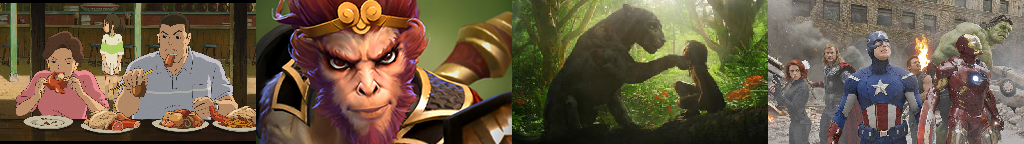

In [14]:
from IPython.display import Image
Image(filename='toons/avengers/dims4.png', width=400)

*Don't forget to add the white border!*

## Vertical strip

This is how to stitch images *vertically*:

In [15]:
list_im = ['toons/miyazaki/spirited away/chihiro_parents.png',
            'toons/monkey-king/Monkey_King.png',
            'toons/jungle-book/_104680082_junglebook.jpg',
            'toons/avengers/dims.jpg']
imgs    = [ PIL.Image.open(i) for i in list_im ]

# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

# save that beautiful picture
imgs_comb = PIL.Image.fromarray( imgs_comb)
imgs_comb.save( 'toons/avengers/dims5.png' ) 

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if __name__ == '__main__':


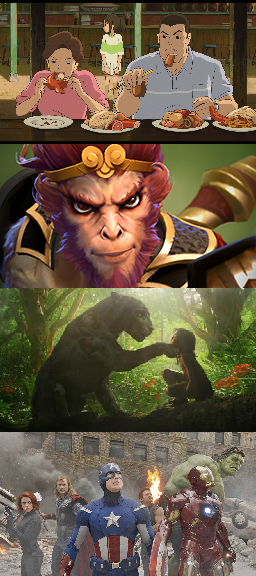

In [16]:
from IPython.display import Image
Image(filename='toons/avengers/dims5.png', width=200)

Now, can you do the same thing with a white border between the images?

## From images to pdfs

This is how to create a pdf from image pages:
```(python)
pip install fpdf
```

In [17]:
from PIL import Image
from fpdf import FPDF

#pdf = FPDF()
cover = Image.open('toons/jungle-book/_104680082_junglebook.jpg')
width, height = cover.size
pdf = FPDF(unit = "pt", format = [width, height])
    
# imagelist is the list with all image filenames
imagelist = ['toons/avengers/dims5.png', 
             'toons/avengers/dims5.png', 
             'toons/avengers/dims5.png', 
             'toons/avengers/dims5.png']

for image in imagelist:
    pdf.add_page()
    pdf.image(image, 0, 0, width, height)
pdf.output("toons/avengers/avengers.pdf", "F")
print("done!")

done!


## Page with random number of images per line (from 3 to 5)

Comic books look a lot neater with a different number of iages per line.

Careful... *this is **advanced** python-fu!*

In [189]:
list_im = [str(x) for x in range(100)]
   
while 0 < len(list_im):
    lines = 0
    print("new page!")
    num_cols = old_num_cols = 0
    while lines < 6 and 0 < len(list_im):
        lines += 1
        while num_cols == old_num_cols:
            num_cols = np.random.randint(3, 6)
        old_num_cols = num_cols
        window = list_im[:num_cols]
        print(window)
        list_im = list_im[num_cols:]

new page!
['0', '1', '2', '3']
['4', '5', '6']
['7', '8', '9', '10']
['11', '12', '13']
['14', '15', '16', '17', '18']
['19', '20', '21']
new page!
['22', '23', '24', '25']
['26', '27', '28']
['29', '30', '31', '32', '33']
['34', '35', '36', '37']
['38', '39', '40', '41', '42']
['43', '44', '45']
new page!
['46', '47', '48']
['49', '50', '51', '52', '53']
['54', '55', '56', '57']
['58', '59', '60']
['61', '62', '63', '64']
['65', '66', '67', '68', '69']
new page!
['70', '71', '72', '73']
['74', '75', '76']
['77', '78', '79', '80', '81']
['82', '83', '84']
['85', '86', '87', '88']
['89', '90', '91', '92', '93']
new page!
['94', '95', '96']
['97', '98', '99']


In [ ]:
from os import listdir
from os.path import isfile, join

mypath = 'toons/avengers/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

lines = 0
print("new page!")
num_cols = old_num_cols = 0
while lines < 6 and 0 < len(onlyfiles):
    lines += 1
    while num_cols == old_num_cols:
        num_cols = np.random.randint(3, 6)
    old_num_cols = num_cols
    window = onlyfiles[:num_cols]
    print(window)   
    onlyfiles = onlyfiles[num_cols:]

What does a good cartoon page look like? Here is one example I worked on:

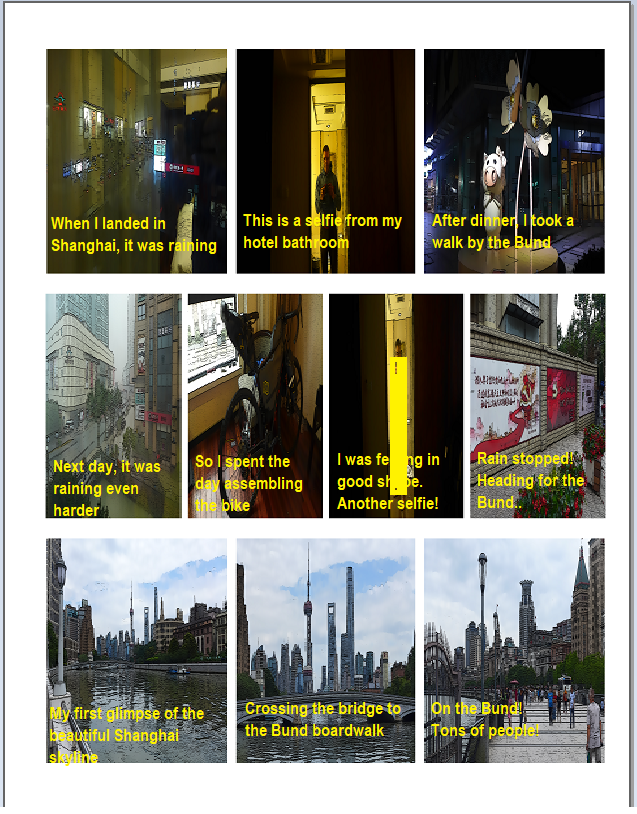

In [69]:
from IPython.display import Image
Image(filename='toons/bund-dino.png', width=400)

We will celebrate our Oscars the week after next week (so the TAs and I can judget them): Best screenplay, best cinematography, best male/animal actor, best female/animal actor. 

If you win an Oscar, you need to prepare a speech. You know, something along the lines of:

>**OSCAR SPEECH**: *I would like to thank my mum and my dad for having me, such a child prodigy, and I would like to thank god, too, for adding humility to my **endless** list of qualities. Also, my girl/boy friend for putting up with me while I ork all weekend and nights too!, doing my python homework, etc, etc.

<br />
<center>
<img src="oscars.png" width=400 />
    The fourth bi-annual INFO 6105 Oscars!
</center>